# Does school funding impact students academic performance?
   
   <img src="images/education-header.png">
   
   **Credit:**  [techxend](https://www.techxtend.com/site/content/education) 

In [1]:
# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings
import scipy.stats as st

sns.set_theme(style="ticks", color_codes=True)


warnings.filterwarnings("ignore")  # Suppress all warnings

In [2]:
# read file
df = pd.read_csv('20210101/final_merged.csv', index_col = 0)
df

,District Code,Agency Name,Total Enrollment,Total Revenue,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,County Code,Test Id,Mean Scale Score,Total Tested At Entity Level,Total Tested with Scores,CAASPP Reported Enrollment,Students Tested,Students with Scores,Total Standard Exceeded,Total Standard Met,Total Standard Met and Above,Total Standard Nearly Met,Total Standard Not Met
3120,10017,ALAMEDA COUNTY OFFICE OF EDUCATION,2870.0,55795000.0,19440.77,White,209.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1329,10017,ALAMEDA COUNTY OFFICE OF EDUCATION,2870.0,55795000.0,19440.77,Hispanic,1581.0,1.0,1.0,2464.90,75.0,75.0,109.0,27.0,27.0,0.0,2.0,2.0,8.0,17.0
7379,10017,ALAMEDA COUNTY OFFICE OF EDUCATION,2870.0,55795000.0,19440.77,Hawaiian Native/Pacific Islander,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1328,10017,ALAMEDA COUNTY OFFICE OF EDUCATION,2870.0,55795000.0,19440.77,Hispanic,1581.0,1.0,2.0,2431.30,100.0,100.0,110.0,36.0,36.0,0.0,0.0,0.0,2.0,34.0
8,10017,ALAMEDA COUNTY OFFICE OF EDUCATION,2870.0,55795000.0,19440.77,Black,543.0,1.0,2.0,2403.70,115.0,115.0,157.0,45.0,45.0,0.0,0.0,0.0,0.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8267,77032,SBE - AUDEO CHARTER II,287.0,0.0,0.00,Hawaiian Native/Pacific Islander,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2763,77032,SBE - AUDEO CHARTER II,287.0,0.0,0.00,Hispanic,173.0,37.0,1.0,2569.25,329.0,329.0,89.0,84.0,84.0,14.0,28.0,42.0,25.0,17.0
2762,77032,SBE - AUDEO CHARTER II,287.0,0.0,0.00,Hispanic,173.0,37.0,2.0,2508.35,336.0,336.0,89.0,86.0,86.0,2.0,11.0,13.0,26.0,47.0
1070,77032,SBE - AUDEO CHARTER II,287.0,0.0,0.00,Black,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# columns present on the dataset
df.columns

Index(['District Code', 'Agency Name', 'Total Enrollment', 'Total Revenue',
       'Revenue per student', 'Subgroup ID', 'Count Enrollment per ethnicity',
       'County Code', 'Test Id', 'Mean Scale Score',
       'Total Tested At Entity Level', 'Total Tested with Scores',
       'CAASPP Reported Enrollment', 'Students Tested', 'Students with Scores',
       'Total Standard Exceeded', 'Total Standard Met',
       'Total Standard Met and Above', 'Total Standard Nearly Met',
       'Total Standard Not Met'],
      dtype='object')

In [4]:
# checking unique ethinicities present in subgroup ID 
df['Subgroup ID'].unique()

array(['White', 'Hispanic', 'Hawaiian Native/Pacific Islander', 'Black',
       'Asian or Pacific Islander', 'Two or More Races',
       'American Indian/Alaska Native', 'Filipino'], dtype=object)

In [5]:
# filtering for ethiniticies of interest
# Step 1: create list of the ethiniticies of interest
#list1 = ['White', 'Black', 'Hispanic', 'Asian or Pacific Islander', 'Two or More Races']

# Step 2: filter based on the list above
#df = df[df['Subgroup ID'].isin(list1)]
#df.head(5)

In [6]:
# filtering based on total enrollment
df = df[df['Total Enrollment'] != 0]
df = df[df['Total Enrollment'] > 250]

# need to filter out the 6 schools that have more students tested than enrolled

In [7]:
# filtering office of education out of the main dataset for analysis
# dataset containing only districts called office of education:
OFFICE_OF_EDUCATION = df[df['Agency Name'].str.contains('COUNTY OFFICE OF EDUCATION')]
print(OFFICE_OF_EDUCATION.shape)

# filter office of education out of the main dataset
df = df[~df['Agency Name'].str.contains('COUNTY OFFICE OF EDUCATION')]

# filter Charters out of the main dataset
df = df[~df['Agency Name'].str.contains('SBE - AUDEO CHARTER')]

# sort by alphabetical oder on Agency Name
df = df.sort_values(['Agency Name'])
df

(311, 20)


,District Code,Agency Name,Total Enrollment,Total Revenue,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,County Code,Test Id,Mean Scale Score,Total Tested At Entity Level,Total Tested with Scores,CAASPP Reported Enrollment,Students Tested,Students with Scores,Total Standard Exceeded,Total Standard Met,Total Standard Met and Above,Total Standard Nearly Met,Total Standard Not Met
1319,64212,ABC UNIFIED,20722.0,226251000.0,10918.40,Hispanic,9425.0,19.0,1.0,2516.100000,40392.0,40384.0,10332.0,10098.0,10096.0,1856.0,3122.0,4980.0,2642.0,2476.0
3111,64212,ABC UNIFIED,20722.0,226251000.0,10918.40,White,1302.0,19.0,1.0,2556.900000,5296.0,5296.0,1378.0,1324.0,1324.0,436.0,462.0,898.0,248.0,178.0
7372,64212,ABC UNIFIED,20722.0,226251000.0,10918.40,Hawaiian Native/Pacific Islander,158.0,19.0,2.0,2533.075000,704.0,704.0,150.0,148.0,148.0,29.0,32.0,61.0,43.0,44.0
8478,64212,ABC UNIFIED,20722.0,226251000.0,10918.40,Two or More Races,524.0,19.0,1.0,2585.557143,2728.0,2728.0,694.0,682.0,682.0,324.0,220.0,544.0,76.0,62.0
1318,64212,ABC UNIFIED,20722.0,226251000.0,10918.40,Hispanic,9425.0,19.0,2.0,2502.342857,40680.0,40656.0,10332.0,10170.0,10164.0,1420.0,2233.0,3653.0,3155.0,3359.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9864,67959,YUCAIPA-CALIMESA JOINT UNIFIED,9969.0,93604000.0,9389.51,Two or More Races,807.0,36.0,2.0,2535.000000,328.0,328.0,56.0,54.0,54.0,7.0,14.0,21.0,16.0,17.0
8476,67959,YUCAIPA-CALIMESA JOINT UNIFIED,9969.0,93604000.0,9389.51,Hawaiian Native/Pacific Islander,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3108,67959,YUCAIPA-CALIMESA JOINT UNIFIED,9969.0,93604000.0,9389.51,Hispanic,4038.0,36.0,2.0,2475.757143,16032.0,16024.0,4056.0,4008.0,4006.0,318.0,732.0,1050.0,1152.0,1804.0
7371,67959,YUCAIPA-CALIMESA JOINT UNIFIED,9969.0,93604000.0,9389.51,American Indian/Alaska Native,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# checking total enrollment data
# we see that there's a wide number of students per district. 
# the smallest district has 251 students and the largest over 630,000 students
df['Total Enrollment'].describe()

count      8059.000000
mean       9399.582703
std       28671.380964
min         251.000000
25%        1264.500000
50%        3799.000000
75%       10554.000000
max      633621.000000
Name: Total Enrollment, dtype: float64

In [9]:
# checking revenue per student data
# we see that the average capiutal per student is around 9640
# the minimum is 0 and the max capital per student is over 77000 clearly an outlier - we need to fix these
df['Revenue per student'].describe()

count     8059.000000
mean      9642.010673
std       4668.725421
min          0.000000
25%       7633.180000
50%       9512.710000
75%      11622.430000
max      77687.500000
Name: Revenue per student, dtype: float64

In [10]:
# dataset containing school districts with over $20,000 revenue per student
df_high_funding = df[(df['Revenue per student'] > 20_000)]

# update the main dataset to not include schools with over 20k revenue per student nor zero revenue per student
df = df[~(df['Revenue per student'] > 20_000)]
df = df[~(df['Revenue per student'] == 0)]

print(df_high_funding.shape)


(101, 20)


In [11]:
# checking the school districts that have revenue per student higher than 20,000
df_high_funding['Agency Name'].unique()

array(['BAYSHORE ELEMENTARY', 'BYRON UNION ELEMENTARY', 'EMERY UNIFIED',
       'KLAMATH-TRINITY JOINT UNIFIED', 'LAWNDALE ELEMENTARY',
       'MOUNT PLEASANT ELEMENTARY',
       'ORANGE COUNTY DEPARTMENT OF EDUCATION', 'TAFT UNION HIGH',
       'VAL VERDE UNIFIED', 'WOODSIDE ELEMENTARY'], dtype=object)

In [12]:
# Checking what the dataset looks like now
df.shape

(7771, 20)

--------------------

# DATASET TEST ID 1

In [13]:
# splitting the main dataset into test 1 and test 2 datasets
# then, splitting test 1 dataset into several datasets according to total enrollment

# Filter based on TEST ID1
list = ['1.0']
test_Id1 = df[df['Test Id'].isin(list)]
test_ID1 = test_Id1.drop(['Test Id', 'County Code', 'Total Tested At Entity Level', 
               'Total Standard Met and Above', 'Students Tested', 'Total Revenue',
              'Total Tested with Scores', 'Students with Scores', 'District Code'], axis=1)
test_ID1.head(5)

,Agency Name,Total Enrollment,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met
1319,ABC UNIFIED,20722.0,10918.4,Hispanic,9425.0,2516.100000,10332.0,1856.0,3122.0,2642.0,2476.0
3111,ABC UNIFIED,20722.0,10918.4,White,1302.0,2556.900000,1378.0,436.0,462.0,248.0,178.0
8478,ABC UNIFIED,20722.0,10918.4,Two or More Races,524.0,2585.557143,694.0,324.0,220.0,76.0,62.0
4889,ABC UNIFIED,20722.0,10918.4,Asian or Pacific Islander,7459.0,2615.285714,5476.0,3322.0,1396.0,410.0,262.0
7373,ABC UNIFIED,20722.0,10918.4,Hawaiian Native/Pacific Islander,158.0,2543.375000,150.0,35.0,37.0,47.0,31.0


In [ ]:
# filtering for ethiniticies of interest
#Step 1: create list of the ethiniticies of interest
list1 = ['White', 'Black', 'Hispanic', 'Asian or Pacific Islander']

# Step 2: filter based on the list above
test_ID1 = test_ID1[test_ID1['Subgroup ID'].isin(list1)]
test_ID1.head(5)

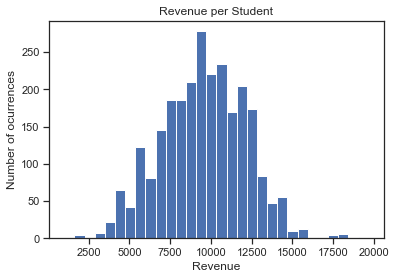

In [14]:
_ = plt.hist(test_ID1['Revenue per student'], density=False, bins=30)
_ = plt.ylabel('Number of ocurrences')
_ = plt.xlabel('Revenue')
_ = plt.title("Revenue per Student")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Mean Scale Score', ylabel='Revenue per student'>

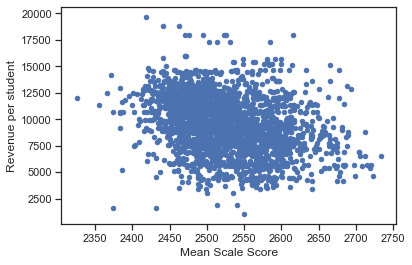

In [15]:
scatterplot1 = test_ID1[['Revenue per student', 'Mean Scale Score']]
scatterplot1
scatterplot1.plot.scatter(x='Mean Scale Score', y='Revenue per student')

In [16]:
#test_ID1['Pass'] = test_ID1['Total Standard Exceeded'] + test_ID1['Total Standard Met']
#test_ID1['Fail'] = test_ID1['Total Standard Nearly Met'] + test_ID1['Total Standard Not Met']

,Agency Name,Total Enrollment,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met
1319,ABC UNIFIED,20722.0,10918.40,Hispanic,9425.0,2516.100000,10332.0,1856.0,3122.0,2642.0,2476.0
3111,ABC UNIFIED,20722.0,10918.40,White,1302.0,2556.900000,1378.0,436.0,462.0,248.0,178.0
4889,ABC UNIFIED,20722.0,10918.40,Asian or Pacific Islander,7459.0,2615.285714,5476.0,3322.0,1396.0,410.0,262.0
1,ABC UNIFIED,20722.0,10918.40,Black,1791.0,2520.542857,1896.0,356.0,624.0,434.0,426.0
2,ACALANES UNION HIGH,5502.0,6853.87,Black,95.0,2561.900000,50.0,10.0,12.0,10.0,16.0


## Large districts: above 60,000 total enrollment

In [18]:
# filtering based on total enrollment
large_districts_ID1 = test_ID1[test_ID1['Total Enrollment'] >= 60_000]
print(large_districts_ID1.shape)

# there are 2 school dsitricts with enrollment larger or equal to 100,000
large_districts_ID1['Agency Name'].unique()

(24, 11)


array(['ELK GROVE UNIFIED', 'FRESNO UNIFIED', 'LONG BEACH UNIFIED',
       'LOS ANGELES UNIFIED', 'SAN DIEGO UNIFIED',
       'SAN FRANCISCO UNIFIED'], dtype=object)

## Medium districts: between 30,000 and 60,000 total enrollment

In [19]:
# filtering based on size
medium_districts_ID1 = test_ID1[(test_ID1['Total Enrollment'] < 60_000) & (test_ID1['Total Enrollment'] >= 30_000)]
print(medium_districts_ID1.shape)

# checking number of school districts which is 8
print(medium_districts_ID1['Agency Name'].unique())

medium_districts_ID1.head(5)

(108, 11)
['ANAHEIM UNION HIGH' 'BAKERSFIELD CITY' 'CAPISTRANO UNIFIED'
 'CHULA VISTA ELEMENTARY' 'CLOVIS UNIFIED' 'CORONA-NORCO UNIFIED'
 'FONTANA UNIFIED' 'FREMONT UNIFIED' 'GARDEN GROVE UNIFIED'
 'IRVINE UNIFIED' 'KERN HIGH' 'LODI UNIFIED' 'MORENO VALLEY UNIFIED'
 'MT. DIABLO UNIFIED' 'OAKLAND UNIFIED' 'POWAY UNIFIED'
 'RIVERSIDE UNIFIED' 'SACRAMENTO CITY UNIFIED'
 'SAN BERNARDINO CITY UNIFIED' 'SAN JOSE UNIFIED' 'SAN JUAN UNIFIED'
 'SAN RAMON VALLEY UNIFIED' 'SANTA ANA UNIFIED' 'STOCKTON UNIFIED'
 'SWEETWATER UNION HIGH' 'TWIN RIVERS UNIFIED' 'WEST CONTRA COSTA UNIFIED']


,Agency Name,Total Enrollment,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met
4926,ANAHEIM UNION HIGH,30731.0,11382.87,Asian or Pacific Islander,5287.0,2648.066667,3986.0,1907.0,1344.0,430.0,256.0
35,ANAHEIM UNION HIGH,30731.0,11382.87,Black,716.0,2540.533333,720.0,92.0,210.0,176.0,224.0
3155,ANAHEIM UNION HIGH,30731.0,11382.87,White,3135.0,2570.733333,3108.0,595.0,1062.0,659.0,651.0
1364,ANAHEIM UNION HIGH,30731.0,11382.87,Hispanic,20555.0,2523.366667,20432.0,1682.0,5270.0,5410.0,7516.0
3191,BAKERSFIELD CITY,30372.0,12540.99,White,2899.0,2503.033333,3526.0,785.0,962.0,714.0,962.0


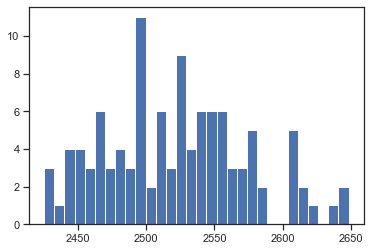

In [20]:
#medium_districts_ID1 = medium_districts_ID1[~(medium_districts_ID1['Mean Scale Score'] < 5000)]
_ = plt.hist(medium_districts_ID1['Mean Scale Score'], density=False, bins=30)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Mean Scale Score', ylabel='Revenue per student'>

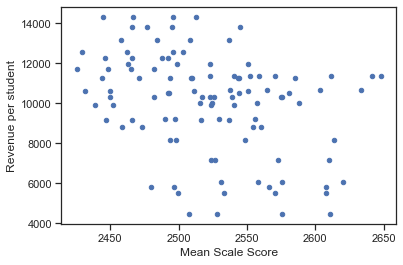

In [21]:
scatterplot1 = medium_districts_ID1[['Revenue per student', 'Mean Scale Score']]
scatterplot1
scatterplot1.plot.scatter(x='Mean Scale Score', y='Revenue per student')

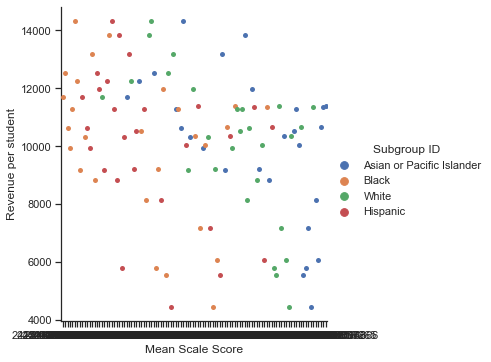

In [22]:
_ = sns.catplot(x='Mean Scale Score', y="Revenue per student", hue="Subgroup ID", kind="swarm", data=medium_districts_ID1)

## Small districts: between 10,000 and 30,000 total enrollment

In [23]:
small_districts_ID1 = test_ID1[(test_ID1['Total Enrollment'] < 30_000) & (test_ID1['Total Enrollment'] >= 10_000)]
print(small_districts_ID1.shape)


small_districts_ID1.head(5)

(518, 11)


,Agency Name,Total Enrollment,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met
1319,ABC UNIFIED,20722.0,10918.4,Hispanic,9425.0,2516.100000,10332.0,1856.0,3122.0,2642.0,2476.0
3111,ABC UNIFIED,20722.0,10918.4,White,1302.0,2556.900000,1378.0,436.0,462.0,248.0,178.0
4889,ABC UNIFIED,20722.0,10918.4,Asian or Pacific Islander,7459.0,2615.285714,5476.0,3322.0,1396.0,410.0,262.0
1,ABC UNIFIED,20722.0,10918.4,Black,1791.0,2520.542857,1896.0,356.0,624.0,434.0,426.0
3116,ACTON-AGUA DULCE UNIFIED,10000.0,2998.3,White,4199.0,2534.557143,644.0,142.0,238.0,130.0,124.0


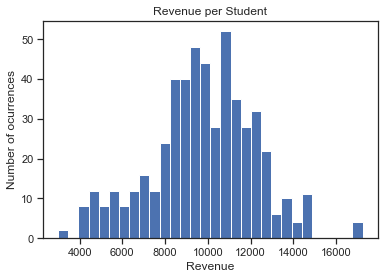

In [24]:
_ = plt.hist(small_districts_ID1['Revenue per student'], density=False, bins=30)
_ = plt.ylabel('Number of ocurrences')
_ = plt.xlabel('Revenue')
_ = plt.title("Revenue per Student")


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Mean Scale Score', ylabel='Revenue per student'>

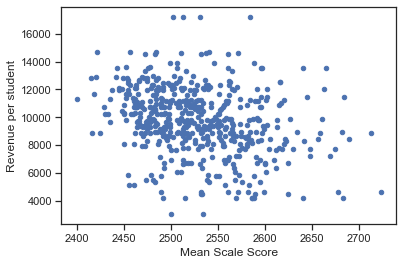

In [25]:
scatterplot = small_districts_ID1[['Revenue per student', 'Mean Scale Score']]
scatterplot
scatterplot.plot.scatter(x='Mean Scale Score', y='Revenue per student')

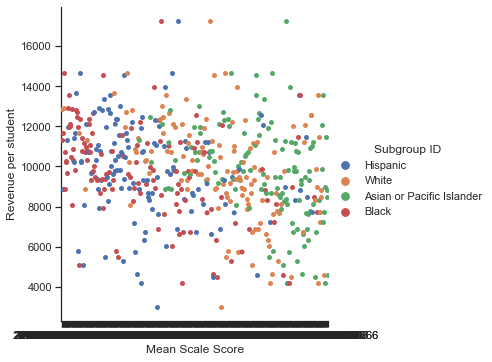

In [42]:
_ = sns.catplot(x='Mean Scale Score', y="Revenue per student", hue="Subgroup ID", kind="swarm", data=small_districts_ID1)

## Smaller districts: between 10,000 and 5,000 total enrollment

In [43]:
smaller_districts_ID1 = test_ID1[(test_ID1['Total Enrollment'] < 10_000) & (test_ID1['Total Enrollment'] >= 5_000)]
print(smaller_districts_ID1.shape)


smaller_districts_ID1.head(5)

(362, 11)


,Agency Name,Total Enrollment,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met
2,ACALANES UNION HIGH,5502.0,6853.87,Black,95.0,2561.90,50.0,10.0,12.0,10.0,16.0
4892,ACALANES UNION HIGH,5502.0,6853.87,Asian or Pacific Islander,850.0,2703.80,444.0,294.0,96.0,30.0,14.0
1320,ACALANES UNION HIGH,5502.0,6853.87,Hispanic,508.0,2645.80,294.0,114.0,88.0,44.0,26.0
3113,ACALANES UNION HIGH,5502.0,6853.87,White,3622.0,2675.50,1824.0,920.0,522.0,186.0,90.0
1338,ALISAL UNION,9235.0,11861.51,Hispanic,8414.0,2426.65,9662.0,644.0,1924.0,2392.0,4575.0


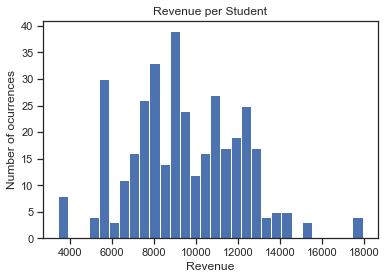

In [45]:
_ = plt.hist(smaller_districts_ID1['Revenue per student'], density=False, bins=30)
_ = plt.ylabel('Number of ocurrences')
_ = plt.xlabel('Revenue')
_ = plt.title("Revenue per Student")

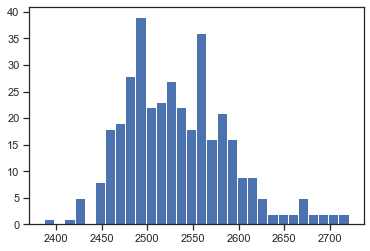

In [46]:
_ = plt.hist(smaller_districts_ID1['Mean Scale Score'], density=False, bins=30)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Mean Scale Score', ylabel='Revenue per student'>

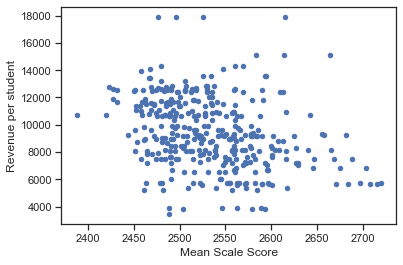

In [47]:
scatterplot = smaller_districts_ID1[['Revenue per student', 'Mean Scale Score']]
scatterplot
scatterplot.plot.scatter(x='Mean Scale Score', y='Revenue per student')

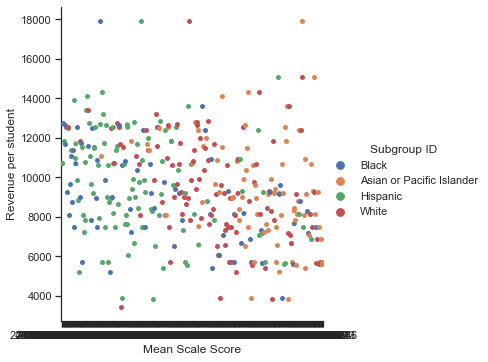

In [48]:
_ = sns.catplot(x='Mean Scale Score', y="Revenue per student", hue="Subgroup ID", kind="swarm", data=smaller_districts_ID1)

## Tiny districts: between 5,000 and 1,000 total enrollment

In [49]:
tiny_districts_ID1 = test_ID1[(test_ID1['Total Enrollment'] < 5_000) & (test_ID1['Total Enrollment'] >= 1000)]
print(tiny_districts_ID1.shape)


tiny_districts_ID1.head(5)

(714, 11)


,Agency Name,Total Enrollment,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met
4901,ALBANY CITY UNIFIED,3702.0,15724.20,Asian or Pacific Islander,1080.0,2591.914286,1110.0,478.0,366.0,116.0,58.0
1333,ALBANY CITY UNIFIED,3702.0,15724.20,Hispanic,603.0,2549.028571,662.0,164.0,248.0,122.0,88.0
3124,ALBANY CITY UNIFIED,3702.0,15724.20,White,1368.0,2599.485714,1548.0,786.0,476.0,150.0,78.0
1344,ALPINE UNION ELEMENTARY,1745.0,7697.99,Hispanic,400.0,2497.483333,466.0,60.0,156.0,112.0,112.0
3135,ALPINE UNION ELEMENTARY,1745.0,7697.99,White,1111.0,2521.883333,1484.0,292.0,550.0,354.0,224.0


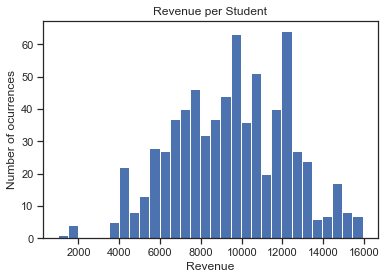

In [50]:
_ = plt.hist(tiny_districts_ID1['Revenue per student'], density=False, bins=30)
_ = plt.ylabel('Number of ocurrences')
_ = plt.xlabel('Revenue')
_ = plt.title("Revenue per Student")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Mean Scale Score', ylabel='Revenue per student'>

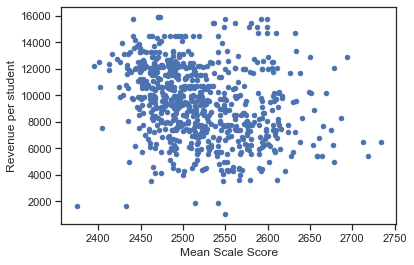

In [51]:
scatterplot1 = tiny_districts_ID1[['Revenue per student', 'Mean Scale Score']]
scatterplot1
scatterplot1.plot.scatter(x='Mean Scale Score', y='Revenue per student')

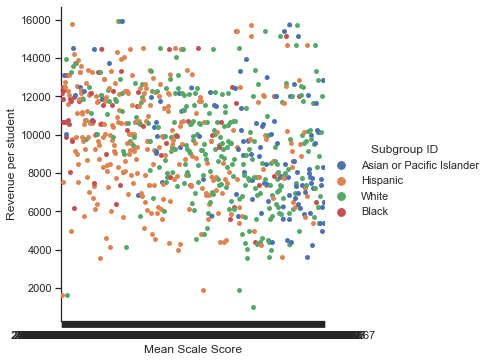

In [52]:
_ = sns.catplot(x='Mean Scale Score', y="Revenue per student", hue="Subgroup ID", kind="swarm", data=tiny_districts_ID1)

## Mini districts: total enrollment less than 1,000

In [53]:
mini_districts_ID1 = test_ID1[(test_ID1['Total Enrollment'] < 1000)]
print(mini_districts_ID1.shape)

mini_districts_ID1.head(5)

(281, 11)


,Agency Name,Total Enrollment,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met
1323,ACKERMAN CHARTER,586.0,7525.60,Hispanic,74.0,2488.200000,56.0,14.0,21.0,15.0,6.0
3115,ACKERMAN CHARTER,586.0,7525.60,White,460.0,2560.033333,582.0,212.0,222.0,96.0,42.0
1342,ALPAUGH UNIFIED,793.0,6331.65,Hispanic,501.0,2431.342857,332.0,6.0,50.0,80.0,190.0
1348,ALTA VISTA ELEMENTARY,555.0,12798.20,Hispanic,449.0,2424.800000,602.0,8.0,72.0,140.0,370.0
3139,ALTA VISTA ELEMENTARY,555.0,12798.20,White,76.0,2416.900000,85.0,1.0,9.0,22.0,49.0


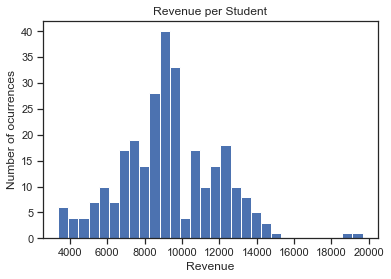

In [54]:
_ = plt.hist(mini_districts_ID1['Revenue per student'], density=False, bins=30)
_ = plt.ylabel('Number of ocurrences')
_ = plt.xlabel('Revenue')
_ = plt.title("Revenue per Student")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Mean Scale Score', ylabel='Revenue per student'>

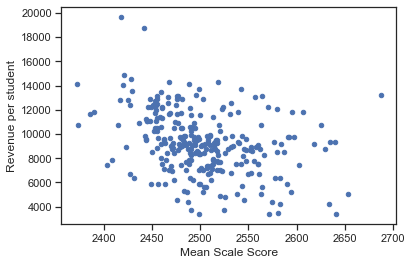

In [55]:
scatterplot1 = mini_districts_ID1[['Revenue per student', 'Mean Scale Score']]
scatterplot1
scatterplot1.plot.scatter(x='Mean Scale Score', y='Revenue per student')

---------------

# DATASET TEST ID 2

In [39]:
# Filter based on TEST ID2
list = ['2.0']
test_Id2 = df[df['Test Id'].isin(list)]
test_ID2 = test_Id1.drop(['Test Id', 'County Code', 'Total Tested At Entity Level', 
               'Total Standard Met and Above', 'Students Tested', 'Total Revenue',
              'Total Tested with Scores', 'Students with Scores', 'District Code'], axis=1)
test_ID2.head(5)


,Agency Name,Total Enrollment,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met
1319,ABC UNIFIED,20722.0,10918.4,Hispanic,9425.0,2516.100000,10332.0,1856.0,3122.0,2642.0,2476.0
3111,ABC UNIFIED,20722.0,10918.4,White,1302.0,2556.900000,1378.0,436.0,462.0,248.0,178.0
8478,ABC UNIFIED,20722.0,10918.4,Two or More Races,524.0,2585.557143,694.0,324.0,220.0,76.0,62.0
4889,ABC UNIFIED,20722.0,10918.4,Asian or Pacific Islander,7459.0,2615.285714,5476.0,3322.0,1396.0,410.0,262.0
7373,ABC UNIFIED,20722.0,10918.4,Hawaiian Native/Pacific Islander,158.0,2543.375000,150.0,35.0,37.0,47.0,31.0


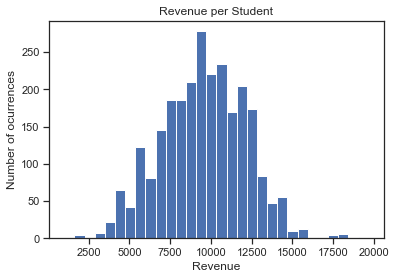

In [40]:
_ = plt.hist(test_ID2['Revenue per student'], density=False, bins=30)
_ = plt.ylabel('Number of ocurrences')
_ = plt.xlabel('Revenue')
_ = plt.title("Revenue per Student")



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Mean Scale Score', ylabel='Revenue per student'>

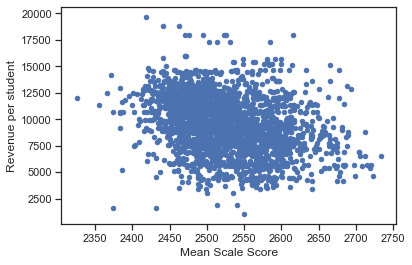

In [41]:
scatterplot1 = test_ID2[['Revenue per student', 'Mean Scale Score']]
scatterplot1
scatterplot1.plot.scatter(x='Mean Scale Score', y='Revenue per student')